In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
# Set up api call
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

In [4]:
print("Starting Data Request")
print("-----------------------------")

City = []	
Lat	= []
Lng	= []
Max_Temp = []	
Humidity = []	
Cloudiness = []	
Wind_Speed = []	
Country	= []
Date = []
Index_Counter = 0
Set_Counter= 1

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        City.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        if Index_Counter > 49:
            Index_Counter = 0
            Set_Counter = Set_Counter + 1
    
        else:
            Index_Counter = Index_Counter + 1
        
        print(f"Processing Record {Index_Counter} of Set {Set_Counter} : {City}")
    
    except(KeyError, IndexError):
        print("Oops, city not found")

print("-----------------------------")
print("Data Complete")

Starting Data Request
-----------------------------
Processing Record 1 of Set 1 : ['Kāmyārān']
Processing Record 2 of Set 1 : ['Kāmyārān', 'New Norfolk']
Processing Record 3 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona']
Processing Record 4 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas']
Processing Record 5 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas', 'Burns Lake']
Processing Record 6 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas', 'Burns Lake', 'Bluff']
Processing Record 7 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas', 'Burns Lake', 'Bluff', 'Cherskiy']
Processing Record 8 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas', 'Burns Lake', 'Bluff', 'Cherskiy', 'Ternate']
Processing Record 9 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas', 'Burns Lake', 'Bluff', 'Cherskiy', 'Ternate', 'Qaanaaq']
Processing Record 10 of Set 1 : ['Kāmyārān', 'New Norfolk', 'Atuona', 'Punta Arenas', 'Burn

In [5]:
# Create DataFrame
weather_dict = {"City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
                "Humidity": Humidity, "Cloudiness": Cloudiness, 
                "Wind Speed": Wind_Speed, "Country": Country, "Date": Date}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kāmyārān,34.7956,46.9355,78.71,19,71,8.21,IR,1661362880
1,New Norfolk,-42.7826,147.0587,51.30,82,85,2.82,AU,1661362880
2,Atuona,-9.8000,-139.0333,77.50,64,44,7.85,PF,1661362881
3,Punta Arenas,-53.1500,-70.9167,42.91,70,20,27.63,CL,1661362812
4,Burns Lake,54.2331,-125.7533,67.42,47,6,1.95,CA,1661362882
...,...,...,...,...,...,...,...,...,...
560,Sisimiut,66.9395,-53.6735,47.88,60,100,2.37,GL,1661363206
561,Evensk,61.9500,159.2333,50.81,92,100,12.88,RU,1661363206
562,Byron Bay,-28.6500,153.6167,43.72,67,0,7.29,AU,1661363207
563,Kirakira,-10.4544,161.9205,78.17,86,97,5.14,SB,1661363208


In [16]:
weather_df.to_csv("output_data/cities.csv", index = False)

In [17]:
# Preform analysis of data
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,18.891314,14.009544,70.101735,68.003540,53.318584,8.080796,1.661363e+09
std,33.521640,88.832034,14.950443,21.520071,37.656827,5.173087,1.137438e+02
min,-54.800000,-179.166700,33.350000,10.000000,0.000000,0.000000,1.661363e+09
25%,-8.566700,-62.272400,59.180000,55.000000,19.000000,4.340000,1.661363e+09
50%,20.894700,19.117700,71.830000,73.000000,56.000000,6.910000,1.661363e+09
75%,47.441100,86.146900,80.580000,84.000000,93.000000,10.690000,1.661363e+09
max,78.218600,179.316700,110.520000,100.000000,100.000000,29.930000,1.661363e+09


In [12]:
humidity_greater = weather_df.loc[weather_df["Humidity"] >100.00]
humidity_greater.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
# Plotting the Data

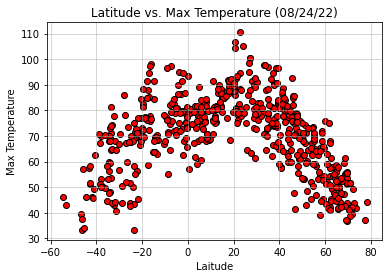

<Figure size 432x288 with 0 Axes>

In [24]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Max Temperature (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Max Temperature.png")

In [ ]:
# The further away from the equater, the colder the city

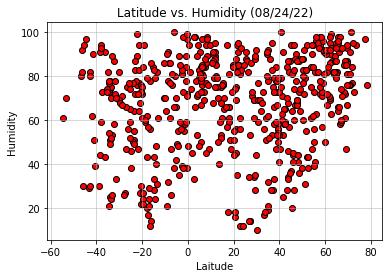

<Figure size 432x288 with 0 Axes>

In [27]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Humidity (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Humidity")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Humidity.png")

In [ ]:
#Humidity is strongest within the first 40 points of either hemishpere. 

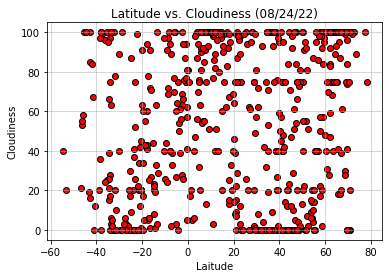

<Figure size 432x288 with 0 Axes>

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "red", edgecolor = "black")
plt.title("Latitude vs. Cloudiness (08/24/22)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.show()
plt.savefig("Latitude vs Cloudiness.png")